In [1]:
using LightGraphs, Plasmo, PlasmoPlots
using KaHyPar, Metis

In [2]:
graph = Plasmo.OptiGraph()

# Add nodes for 8 variables
N = 8
Plasmo.@optinode(graph, n[1:N])

obj_coeff = [8, 5, 6, 9, 7, 9, 6, 5]
for (i,node) in enumerate(n)
    Plasmo.@variable(node, x)
    Plasmo.@constraint(node, x >= 0)
    Plasmo.@objective(node, Max, obj_coeff[i]*x)
end

Plasmo.@linkconstraint(graph, 5*n[1][:x]+3*n[2][:x]+2*n[4][:x]+3*n[6][:x]+4*n[7][:x]+6*n[8][:x] <= 30)
Plasmo.@linkconstraint(graph, 2*n[1][:x]+4*n[3][:x]+3*n[4][:x]+7*n[5][:x]+n[7][:x] <= 20)

Plasmo.@linkconstraint(graph, 2*n[1][:x]+4*n[2][:x]+3*n[3][:x] <= 10)
Plasmo.@linkconstraint(graph, 7*n[1][:x]+3*n[2][:x]+6*n[3][:x] <= 15)
Plasmo.@linkconstraint(graph, 5*n[1][:x]+3*n[3][:x] <= 12)

Plasmo.@linkconstraint(graph, 3*n[4][:x]+n[5][:x]+2*n[6][:x] <= 7)
Plasmo.@linkconstraint(graph, 2*n[4][:x]+4*n[5][:x]+3*n[6][:x] <= 9)

Plasmo.@linkconstraint(graph, 8*n[7][:x]+5*n[8][:x] <= 25)
Plasmo.@linkconstraint(graph, 7*n[7][:x]+9*n[8][:x] <= 30)
Plasmo.@linkconstraint(graph, 6*n[7][:x]+4*n[8][:x] <= 20);

In [3]:
graph

      OptiGraph: # elements (including subgraphs)
-------------------------------------------------------------------
      OptiNodes:     8              (8)
      OptiEdges:     6              (6)
LinkConstraints:    10             (10)
 sub-OptiGraphs:     0              (0)

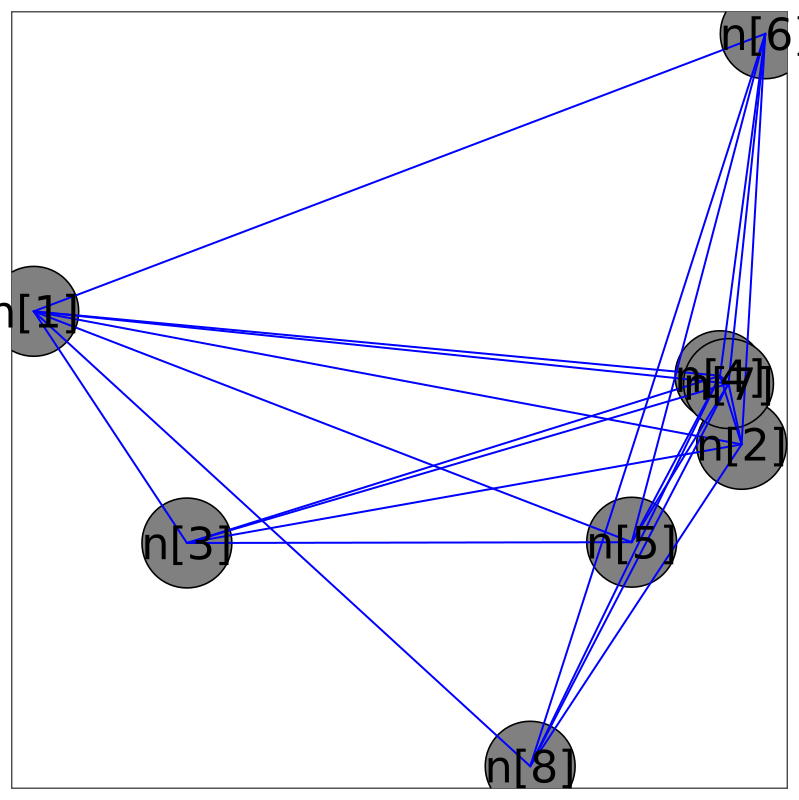

In [4]:
# visualize graph topology
plt_graph = PlasmoPlots.layout_plot(graph, node_labels=true, markersize=50, labelsize=30, linewidth=2, layout_options=Dict(:tol => 0.01, :iterations => 2))

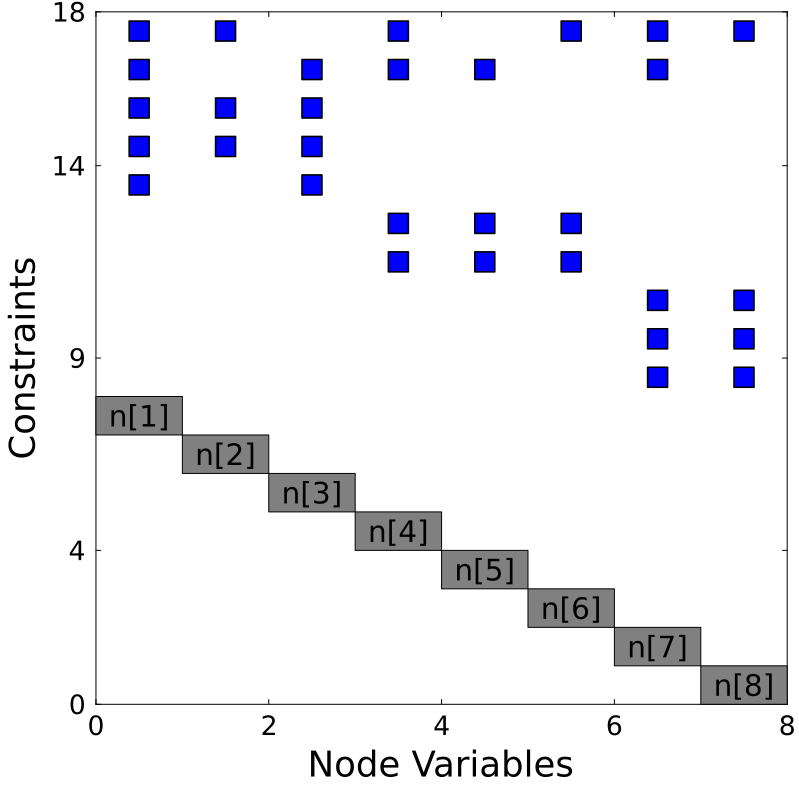

In [5]:
# visualize graph adjacency
plt_matrix = PlasmoPlots.matrix_plot(graph, node_labels=true, markersize=10, labelsize=20)

* Graph partitioning

In [108]:
# hyper graph 형태로 변환
hypergraph, projection_map = Plasmo.hyper_graph(graph)

# standard graph 형태로 변환
# cgraph, projection_map = LightGraphs.SimpleGraphs.clique_graph(graph) # Plasmo.clique_graph(graph)

(Hypergraph: (8 , 6), Plasmo.ProjectionMap(      OptiGraph: # elements (including subgraphs)
-------------------------------------------------------------------
      OptiNodes:     8              (8)
      OptiEdges:     6              (6)
LinkConstraints:    10             (10)
 sub-OptiGraphs:     0              (0), Hypergraph: (8 , 6), Dict{Any, Any}(5 => OptiNode w/ 1 Variable(s) and 1 Constraint(s), 4 => OptiNode w/ 1 Variable(s) and 1 Constraint(s), 6 => OptiNode w/ 1 Variable(s) and 1 Constraint(s), 7 => OptiNode w/ 1 Variable(s) and 1 Constraint(s), 2 => OptiNode w/ 1 Variable(s) and 1 Constraint(s), 8 => OptiNode w/ 1 Variable(s) and 1 Constraint(s), 3 => OptiNode w/ 1 Variable(s) and 1 Constraint(s), 1 => OptiNode w/ 1 Variable(s) and 1 Constraint(s)), Dict{Any, Any}(OptiEdge w/ 1 Constraint(s) => HyperEdge: [5, 4, 7, 3, 1], HyperEdge: [2, 3, 1] => OptiEdge w/ 2 Constraint(s), HyperEdge: [3, 1] => OptiEdge w/ 1 Constraint(s), OptiNode w/ 1 Variable(s) and 1 Constraint(s) =>

In [104]:
# Standard graph form
node_vector = KaHyPar.partition(cgraph, 3)
# node_vector = Metis.partition(cgraph.graph, 3, alg=:KWAY) .- 1
partition = Plasmo.Partition(node_vector, projection_map)
Plasmo.apply_partition!(graph, partition)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
+                    _  __     _   _       ____                               + 
+                   | |/ /__ _| | | |_   _|  _ \ __ _ _ __                    + 
+                   | ' // _` | |_| | | | | |_) / _` | '__|                   + 
+                   | . \ (_| |  _  | |_| |  __/ (_| | |                      + 
+                   |_|\_\__,_|_| |_|\__, |_|   \__,_|_|                      + 
+                                    |___/                                    + 
+                 Karlsruhe Hypergraph Partitioning Framework                 + 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
*******************************************************************************
*                            Partitioning Context                             *
*******************************************************************************
Partitioning Parameters:
  Hype

In [109]:
# Hypergraph form
node_vector = KaHyPar.partition(hypergraph, 3, configuration=:connectivity, imbalance=0.01)
partition = Plasmo.Partition(node_vector, projection_map)
Plasmo.apply_partition!(graph, partition)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
+                    _  __     _   _       ____                               + 
+                   | |/ /__ _| | | |_   _|  _ \ __ _ _ __                    + 
+                   | ' // _` | |_| | | | | |_) / _` | '__|                   + 
+                   | . \ (_| |  _  | |_| |  __/ (_| | |                      + 
+                   |_|\_\__,_|_| |_|\__, |_|   \__,_|_|                      + 
+                                    |___/                                    + 
+                 Karlsruhe Hypergraph Partitioning Framework                 + 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
*******************************************************************************
*                            Partitioning Context                             *
*******************************************************************************
Partitioning Parameters:
  Hype

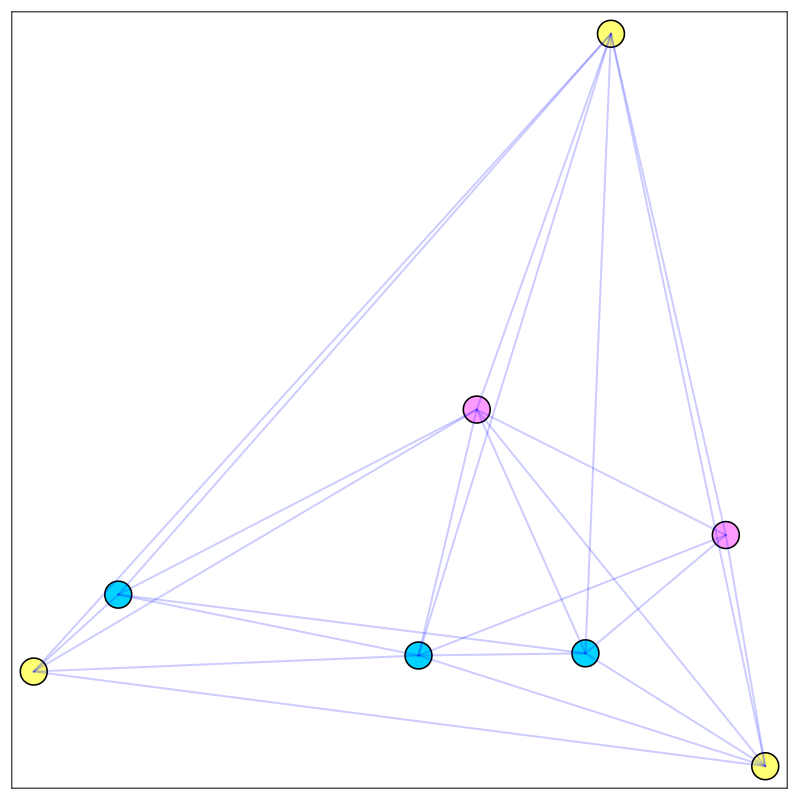

In [110]:
# plot partitioned graph
plt_graph1 = PlasmoPlots.layout_plot(graph, layout_options=Dict(:tol=>0.01, :iterations=>10),linealpha=0.2,markersize=15,subgraph_colors=true)

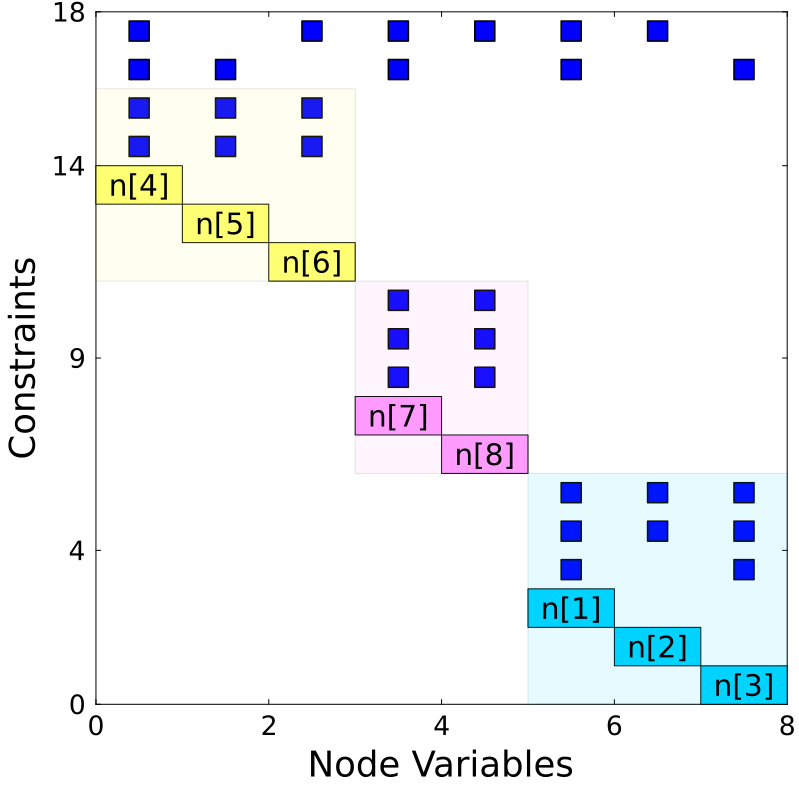

In [111]:
plt_matrix1 = PlasmoPlots.matrix_plot(graph,subgraph_colors=true, node_labels=true, markersize=10, labelsize=20)

In [10]:
graph

      OptiGraph: # elements (including subgraphs)
-------------------------------------------------------------------
      OptiNodes:     0              (8)
      OptiEdges:     2              (6)
LinkConstraints:     2             (10)
 sub-OptiGraphs:     3              (3)